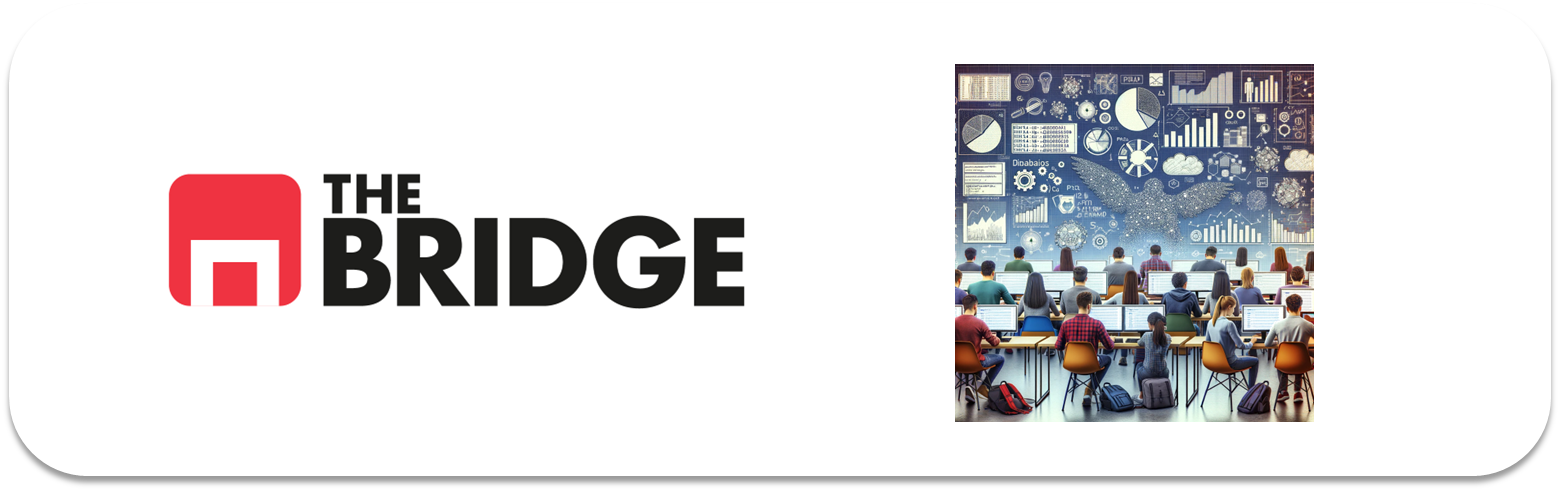

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descargar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es **predecir la mediana del precio de las casas en una zona del área metropolitana de Boston** dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns

In [2]:
# 1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas

df = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", sep = "|")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [4]:
# 2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.

target = "MEDV"

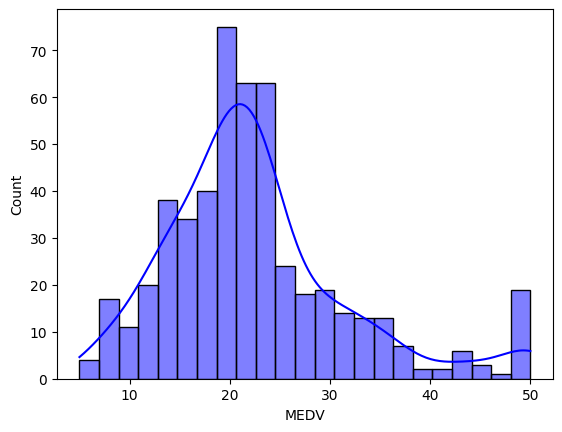

In [5]:
sns.histplot(df['MEDV'], color='Blue', kde = True)
plt.show()

Tiene una distribución en forma de campana de Gauss, una distribución normal, y por tanto eso es una buena señal para aplicar regresión lineal.

In [6]:
# 3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
from sklearn.model_selection import train_test_split

# Divido el dataset en train (80%) y test (20%)
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42) 

In [7]:
# 4. Construye las parejas X,y de train y test

X_train = train_set.drop(target, axis=1)
y_train = train_set[target]

X_test = test_set.drop(target, axis=1)
y_test = test_set[target]

In [8]:
print(df.shape)          #tenemos 506 valores

print(X_train.shape)     #80% de 506
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(506, 13)
(404, 12)
(102, 12)
(404,)
(102,)


In [9]:
# 5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.

train_set.corr(numeric_only= True)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.198855,0.400198,-0.044589,0.396406,-0.200303,0.334090,-0.366487,0.615947,0.576894,0.288970,0.414142,-0.380091
ZN,-0.198855,1.000000,-0.533489,-0.043754,-0.526414,0.274661,-0.575078,0.681817,-0.313790,-0.294267,-0.389163,-0.396572,0.309504
INDUS,0.400198,-0.533489,1.000000,0.095158,0.770957,-0.398690,0.636569,-0.707566,0.588952,0.702353,0.348303,0.603644,-0.470546
CHAS,-0.044589,-0.043754,0.095158,1.000000,0.135476,0.111272,0.096016,-0.121671,0.028685,0.007746,-0.113003,-0.070652,0.190642
NOX,0.396406,-0.526414,0.770957,0.135476,1.000000,-0.299615,0.720417,-0.772330,0.589061,0.650247,0.161253,0.593862,-0.415768
RM,-0.200303,0.274661,-0.398690,0.111272,-0.299615,1.000000,-0.210863,0.198299,-0.199738,-0.281127,-0.342643,-0.612577,0.710680
AGE,0.334090,-0.575078,0.636569,0.096016,0.720417,-0.210863,1.000000,-0.756589,0.430321,0.471670,0.240841,0.571051,-0.340216
DIS,-0.366487,0.681817,-0.707566,-0.121671,-0.772330,0.198299,-0.756589,1.000000,-0.483329,-0.523577,-0.217588,-0.494921,0.235114
RAD,0.615947,-0.313790,0.588952,0.028685,0.589061,-0.199738,0.430321,-0.483329,1.000000,0.912527,0.472257,0.480301,-0.387467
TAX,0.576894,-0.294267,0.702353,0.007746,0.650247,-0.281127,0.471670,-0.523577,0.912527,1.000000,0.444836,0.530632,-0.459795


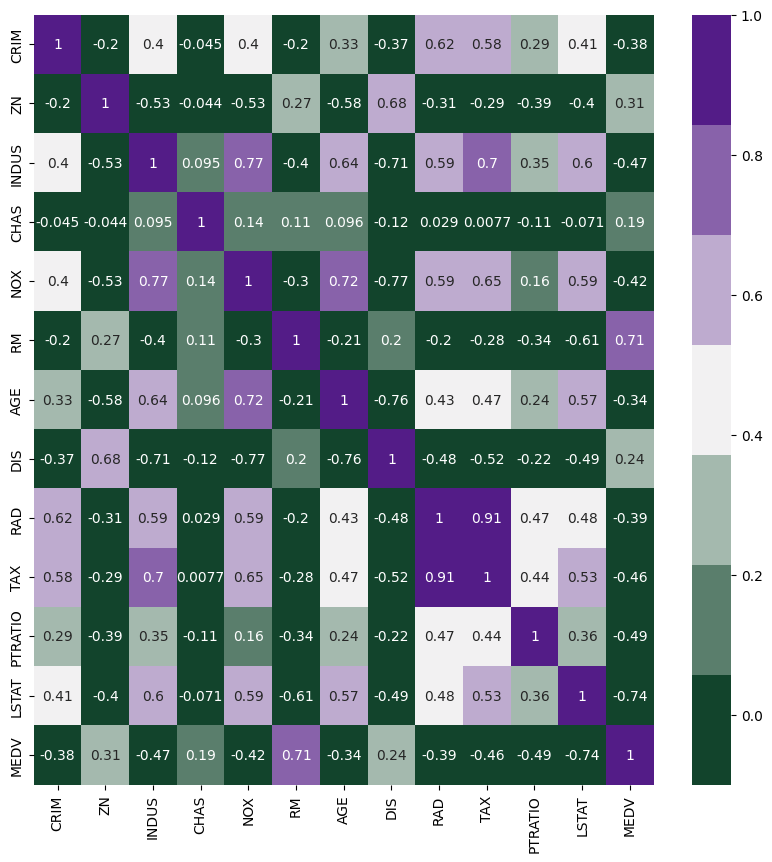

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(train_set.corr(),
           vmin=-0.1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);

In [11]:
# correlacion de las variables numericas (en este caso todas) con la variable target

# np.abs (para valores absolutos)
np.abs(train_set.corr(numeric_only=True)[target]).sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.736422
RM         0.710680
PTRATIO    0.491210
INDUS      0.470546
TAX        0.459795
NOX        0.415768
RAD        0.387467
CRIM       0.380091
AGE        0.340216
ZN         0.309504
DIS        0.235114
CHAS       0.190642
Name: MEDV, dtype: float64

In [12]:
train_set.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,24.91,12.0
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,8.47,19.9
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,7.83,19.4


1) Veo la correlación entre variables (que no sean target), para descartar alguna
- Me interesa las que sean altas entre ellas
- Eliminaré aquella que sea mas baja con el target

2) Todas las demas serán features, veo la correlación con el Target
- Me quedaré con aquellas que sean altas, y será variables predictoras


In [13]:
serie_corr = np.abs(train_set.corr(numeric_only=True)[target]).sort_values(ascending=False)

In [14]:
# entrenamiento si el target
X_train.corr()

umbral_corr = 0.70 # umbral de correlacion alto que voy a aprobar
features_num = X_train.corr() # correlacion de las variables numericas
features_num[features_num.abs() > umbral_corr] # me quedo con las correlaciones que superen el umbral, en valor absoluto

# Quiero visualizar solo la correlacion de las variables numericas que superen el umbral
# con stack() apillo las matrices
filtered_features = features_num[features_num.abs() > umbral_corr].stack().reset_index()

# nombre de las columnas
filtered_features.columns = ['Feature 1', 'Feature 2', 'Correlacion']

# me quedo solo con las correlaciones que no son de la misma variable
filtered_features = filtered_features[filtered_features['Feature 1'] != filtered_features['Feature 2']] 

# Eliminar duplicados
filtered_features = filtered_features.drop_duplicates(subset=['Correlacion'])

# Lista de las filtered_features
filtered_features_list = filtered_features.values.tolist()
print(filtered_features_list)
filtered_features

[['INDUS', 'NOX', 0.7709570000478178], ['INDUS', 'DIS', -0.7075660233762816], ['INDUS', 'TAX', 0.7023533219645569], ['NOX', 'AGE', 0.7204172465094189], ['NOX', 'DIS', -0.7723302876930545], ['AGE', 'DIS', -0.7565888710989642], ['RAD', 'TAX', 0.9125267805269148]]


,Feature 1,Feature 2,Correlacion
3,INDUS,NOX,0.770957
4,INDUS,DIS,-0.707566
5,INDUS,TAX,0.702353
9,NOX,AGE,0.720417
10,NOX,DIS,-0.772330
14,AGE,DIS,-0.756589
20,RAD,TAX,0.912527


In [15]:
# Como INDUS target mayor que NOX, DIS, TAX; descarto estas tres
# Train
X_train.drop(columns = ["NOX", "DIS","TAX"], inplace = True)
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')

In [16]:
# Test
X_test.drop(columns = ["NOX", "DIS","TAX"], inplace = True)
X_test.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')

In [17]:
# Correlacion features y target

series_corr = np.abs(X_train.corrwith(y_train, numeric_only=True)).sort_values(ascending=False)
series_corr

LSTAT      0.736422
RM         0.710680
PTRATIO    0.491210
INDUS      0.470546
RAD        0.387467
CRIM       0.380091
AGE        0.340216
ZN         0.309504
CHAS       0.190642
dtype: float64

In [18]:
# nos quedamos con lasfeatures num que superen el umbral
umbral_corr = 0.34  # umbral de correlacion alto que voy a aprobar
features_num = []

for columna in series_corr.index:
    if series_corr[columna] > umbral_corr:
        features_num.append(columna)

print(features_num)

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'RAD', 'CRIM', 'AGE']


In [19]:
X_train = X_train[features_num]
X_train

,LSTAT,RM,PTRATIO,INDUS,RAD,CRIM,AGE
477,24.91,5.304,20.2,18.10,24.0,15.02340,97.3
15,8.47,5.834,21.0,8.14,4.0,0.62739,56.5
332,7.83,6.031,16.9,6.06,1.0,0.03466,23.3
423,23.29,6.103,20.2,18.10,24.0,7.05042,85.1
19,11.28,5.727,21.0,8.14,4.0,0.72580,69.5
...,...,...,...,...,...,...,...
106,18.66,5.836,20.9,8.56,5.0,0.17120,91.9
270,13.00,5.856,18.6,6.96,3.0,0.29916,42.1
348,5.99,6.635,17.0,2.01,4.0,0.01501,29.7
435,23.27,6.629,20.2,18.10,24.0,11.16040,94.6


In [20]:
np.abs(X_train.corrwith(y_train, numeric_only=True)).sort_values(ascending=False)

LSTAT      0.736422
RM         0.710680
PTRATIO    0.491210
INDUS      0.470546
RAD        0.387467
CRIM       0.380091
AGE        0.340216
dtype: float64

In [21]:
train_set = pd.concat([X_train,y_train],axis=1)

<Axes: >

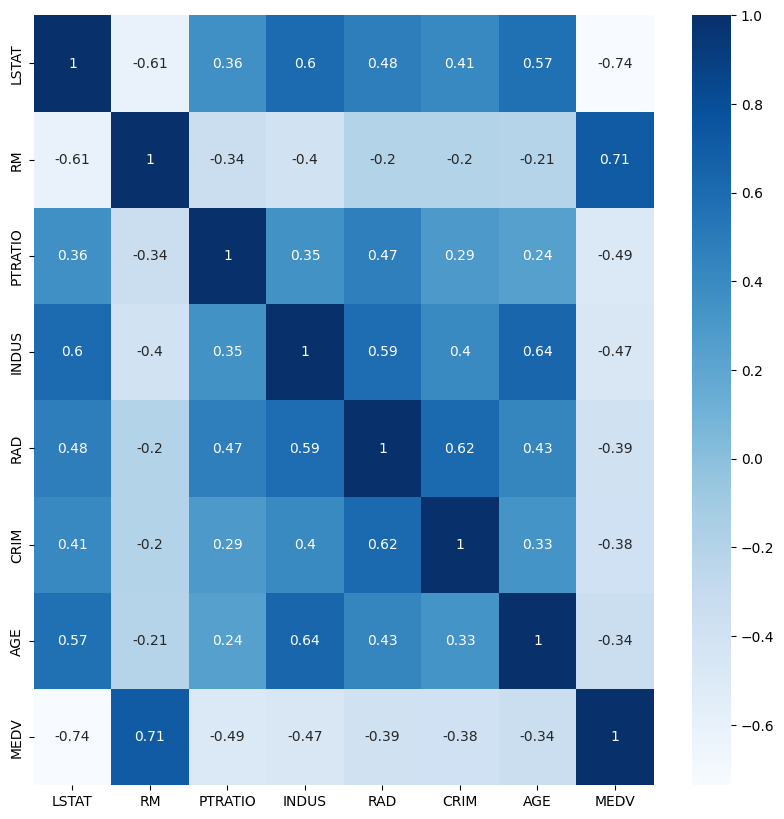

In [22]:
plt.figure(figsize = (10,10))
sns.heatmap(train_set.corr(numeric_only=True), 
            annot = True, 
            cmap = "Blues")

In [23]:
X_train.describe()

,LSTAT,RM,PTRATIO,INDUS,RAD,CRIM,AGE
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,12.457351,6.315891,18.318317,10.985050,9.356436,3.609125,68.556436
std,7.110381,0.709452,2.228701,6.894618,8.589721,8.875058,27.994922
min,1.730000,3.863000,12.600000,0.740000,1.000000,0.009060,2.900000
25%,6.772500,5.890500,16.800000,5.130000,4.000000,0.081437,45.550000
50%,10.925000,6.210000,18.700000,8.560000,5.000000,0.261390,77.700000
75%,16.372500,6.636750,20.200000,18.100000,12.000000,3.202962,93.650000
max,37.970000,8.780000,22.000000,27.740000,24.000000,88.976200,100.000000


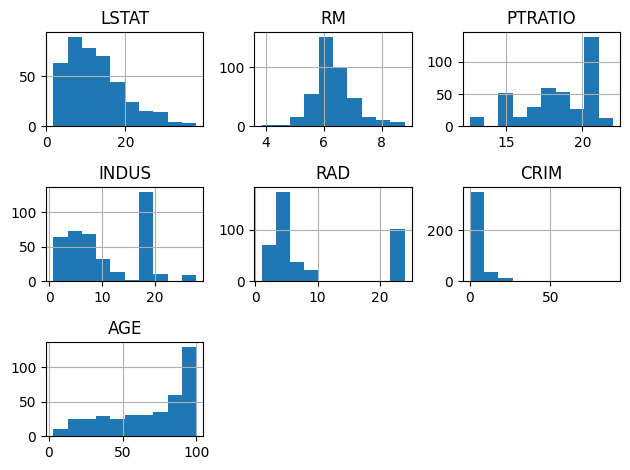

In [24]:
X_train.hist()
plt.tight_layout()

In [25]:
# La variable RAD la trataremos con categorica
X_train.RAD.value_counts(ascending=True) 

RAD
7.0      15
1.0      17
8.0      21
2.0      21
6.0      23
3.0      32
4.0      80
5.0      94
24.0    101
Name: count, dtype: int64

In [26]:
# por tanto la elimino, y la agrego a features_cat
features_num = X_train.drop(columns = "RAD").columns.tolist()
features_cat = "RAD"

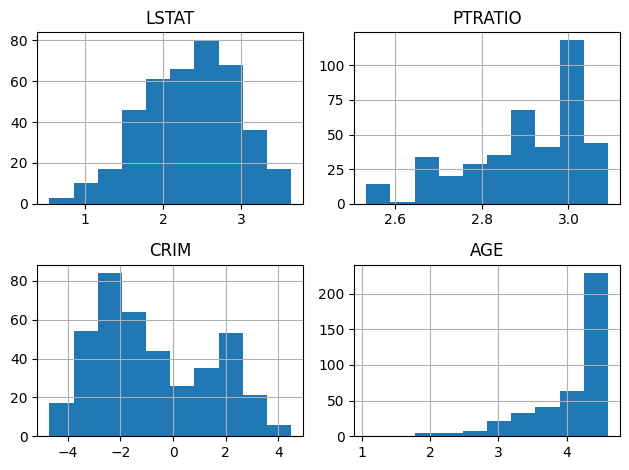

In [27]:
# aplico logaritmo
features_transform = ["LSTAT","PTRATIO","CRIM","AGE"]
for feature in features_transform:
    X_train[feature] = X_train[feature].apply(np.log)

X_train[features_transform].hist()
plt.tight_layout();


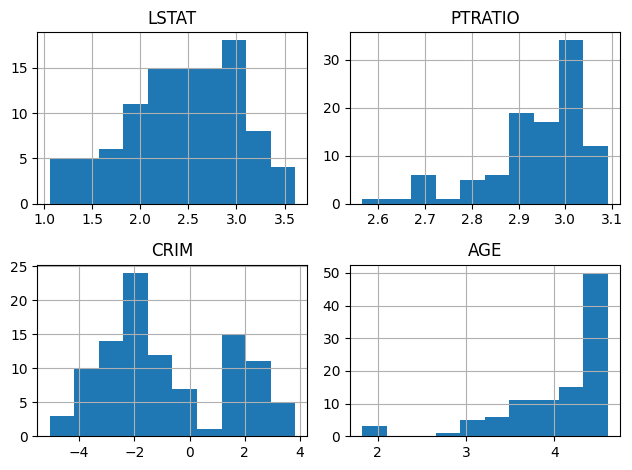

In [33]:
features_transform = ["LSTAT","PTRATIO","CRIM","AGE"]
for feature in features_transform:
    test_set[feature] = test_set[feature].apply(np.log)

test_set[features_transform].hist()
plt.tight_layout();

In [28]:
# 6. Trata las variables para que funcionen lo mejor posible en el modelo.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_set[features_num])

In [29]:
# 7. Construye un modelo de regresión lineal.


In [30]:
# 8. Analiza si lo crees conveniente los pesos y la importancia de las features.


In [31]:
# 9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.


In [32]:
# 10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?